# Assignment 1 - Matrix-matrix multiplication -- ZIJIN SU 22085664

##  Introduction

This notebook explores the computation of the product of two square matrices $A, B \in \mathbb{R}^{n \times n}$.  
Matrix multiplication is a fundamental operation in numerical computing and data analysis, yet it becomes increasingly computationally expensive as the matrix dimension grows. Enhancing the efficiency of this operation is therefore of significant theoretical and practical importance.

## Part 1: A Better Function

Part 1 investigates the improvement of matrix–matrix multiplication efficiency by implementing a new function, `faster_matrix_product`, as an optimized alternative to the baseline `slow_matrix_product`.  
The new function aims to reduce the number of explicit Python loops by making partial use of NumPy’s optimized operations.

To ensure correctness, both functions will be tested on randomly generated square matrices of small sizes using `np.allclose` statements that compare their outputs with NumPy’s built-in matrix multiplication.  

The performance of the two functions will be then evaluated and compared using timing measurements over a range of matrix sizes.  
In the following part, Matplotlib will be used to visualize these timing results, allowing the efficiency gain of the optimized approach to be clearly demonstrated and confirmed.



In [19]:
# relative imports
import numpy as np
import matplotlib.pyplot as plt
from timeit import timeit

#### This step demonstrates the setup of both the slow and fast matrix algorithms, along with a comparison of their results.

In [20]:
# Define a slow matrix multiplication function using triple nested loops
def slow_matrix_product(mat1, mat2):
    """Multiply two matrices."""
    assert mat1.shape[1] == mat2.shape[0]
    result = []
    for c in range(mat2.shape[1]):
        column = []
        for r in range(mat1.shape[0]):
            value = 0
            for i in range(mat1.shape[1]):
                value += mat1[r, i] * mat2[i, c]
            column.append(value)
        result.append(column)
    return np.array(result).transpose()


# Define a fast matrix-vector multiplication function using np.dot() in the innermost loop
def fast_matrix_product(mat1, mat2):
    """
    This function uses np.dot() during computation, which performs efficient 
    vectorized operations in C instead of manual Python loops
    """
    assert mat1.shape[1] == mat2.shape[0]
    result = np.zeros((mat1.shape[0], mat2.shape[1]))
    for i in range(mat1.shape[0]):
        for j in range(mat2.shape[1]):
            result[i, j] = np.dot(mat1[i, :], mat2[:, j])
    return result



# Verify correctness of faster_matrix_product for 2x2 to 5x5 matrices
for n in [2, 3, 4, 5]:
    print(f"Testing matrix size: {n}x{n}")
    mat1 = np.random.rand(n, n)
    mat2 = np.random.rand(n, n)
    
    slow_result = slow_matrix_product(mat1, mat2) 
    fast_result = fast_matrix_product(mat1, mat2)  
    
    # Assert that they are equal
    assert np.allclose(slow_result, fast_result), f" no found for size {n}x{n}" # test through assert statement
    print(f"results for slow_result is ",slow_result[0]) # Here i only Print the first row of the slow_result for verification
    print(f"results for fast_result is ",fast_result[0])
    print(f"Passed for size {n}x{n}")
    
print("All tests passed, so two results are the same")

Testing matrix size: 2x2
results for slow_result is  [1.09271469 1.22420723]
results for fast_result is  [1.09271469 1.22420723]
Passed for size 2x2
Testing matrix size: 3x3
results for slow_result is  [0.32841339 0.13375364 0.39805135]
results for fast_result is  [0.32841339 0.13375364 0.39805135]
Passed for size 3x3
Testing matrix size: 4x4
results for slow_result is  [1.72494649 1.92621211 1.66489224 1.6228076 ]
results for fast_result is  [1.72494649 1.92621211 1.66489224 1.6228076 ]
Passed for size 4x4
Testing matrix size: 5x5
results for slow_result is  [0.64341454 1.4673669  1.37914841 0.88672235 0.8556899 ]
results for fast_result is  [0.64341454 1.4673669  1.37914841 0.88672235 0.8556899 ]
Passed for size 5x5
All tests passed, so two results are the same


In [21]:
# Compare execution times of slow and fast matrix multiplication functions for different matrix sizes from 2x2 to 5x5
N = [10, 20, 50, 100, 200, 300, 400, 500, 700, 1000]
slow_times = []
fast_times = []
for n in N:
    print(f"\nMatrix size: {n}x{n}")
    mat1 = np.random.rand(n, n)
    mat2 = np.random.rand(n, n)
    
    # Measure time for calculating the products
    slow_timing = %timeit -o -q -r 1 -n 1 slow_matrix_product(mat1, mat2)
    fast_timing = %timeit -o -q -r 1 -n 1 fast_matrix_product(mat1, mat2)
    
    # Store the average time consumed value and Calculating the speedup factor in each matrix size for clearer comparison
    slow_times.append(slow_timing.average)
    fast_times.append(fast_timing.average)
    speedup = slow_timing.average / fast_timing.average
    print(f"slow average: {slow_timing.average:.6e}s | Fast: {fast_timing.average:.6e}s | "
    f"speed up factor: {speedup:.1f}x")


Matrix size: 10x10
slow average: 2.612500e-04s | Fast: 3.492080e-04s | speed up factor: 0.7x

Matrix size: 20x20
slow average: 1.764375e-03s | Fast: 1.187042e-03s | speed up factor: 1.5x

Matrix size: 50x50
slow average: 2.239442e-02s | Fast: 1.376208e-03s | speed up factor: 16.3x

Matrix size: 100x100
slow average: 1.285871e-01s | Fast: 4.603958e-03s | speed up factor: 27.9x

Matrix size: 200x200
slow average: 1.013187e+00s | Fast: 2.180763e-02s | speed up factor: 46.5x

Matrix size: 300x300
slow average: 3.495248e+00s | Fast: 5.746162e-02s | speed up factor: 60.8x

Matrix size: 400x400
slow average: 8.429857e+00s | Fast: 1.184854e-01s | speed up factor: 71.1x

Matrix size: 500x500
slow average: 1.649737e+01s | Fast: 2.048840e-01s | speed up factor: 80.5x

Matrix size: 700x700
slow average: 4.691880e+01s | Fast: 5.112024e-01s | speed up factor: 91.8x

Matrix size: 1000x1000
slow average: 1.370584e+02s | Fast: 1.284577e+00s | speed up factor: 106.7x


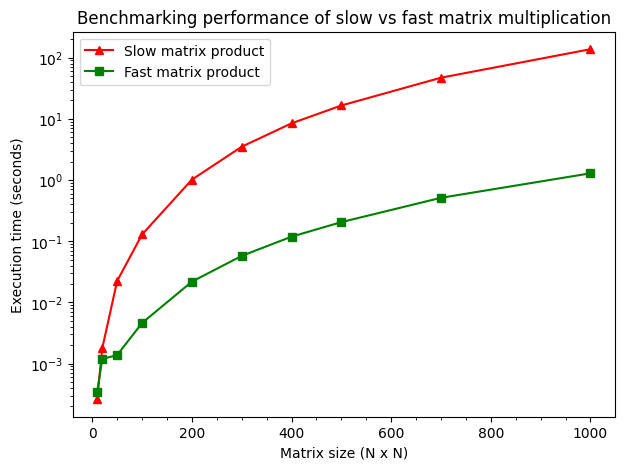

In [22]:
# Plotting the execution times for both methods
plt.figure(figsize=(7,5))
plt.plot(N, slow_times, "r^-", label="Slow matrix product")
plt.plot(N, fast_times, "gs-", label="Fast matrix product")
plt.legend()
plt.yscale("log")
plt.minorticks_on()
plt.xlabel("Matrix size (N x N)")
plt.ylabel("Execution time (seconds)")
plt.title("Benchmarking performance of slow vs fast matrix multiplication")
plt.show()

### 1. Mathematical Computation Rule

The `slow_matrix_product` function directly follows the standard definition of matrix multiplication:

$$
C_{r,c} = \sum_{i=1}^{n} A_{r,i} \times B_{i,c}
$$

In contrast, the `fast_matrix_product` function performs the same computation but at a higher level of abstraction:

$$
C_{r,:} = A_{r,:} \times B
$$

The `slow_matrix_product` uses explicit Python loops to multiply rows of \(A\) with columns of \(B\), which is intuitive but slow due to heavy loop overhead and inefficient memory access.  
In contrast, the `fast_matrix_product` leverages NumPy’s vectorized C operations to compute entire rows at once, minimizing Python-level loops and significantly improving speed.

---

### 2. Data Access and Memory Efficiency

The `fast_matrix_product` achieves higher efficiency by relying on NumPy’s optimized C routines and contiguous row-wise memory access.  
Unlike the loop-based version, which frequently jumps across non-contiguous memory when reading columns of \(B\), the vectorized approach minimizes cache misses and fully utilizes hardware-level optimizations.  
Overall, while `slow_matrix_product` scales with \(O(N^3)\) complexity (three nested loops), the `fast_matrix_product` effectively reduces the Python-level overhead to between \(O(N^2)\) and \(O(N^3)\), the faster version function also does not transpose the outputted matrix, making it significantly faster on large matrices.






## Part 2: Speeding It Up with Numba

In this part, the function `faster_matrix_product` is further optimized using Numba’s **Just-In-Time (JIT)** compilation.  
By applying the `@jit and @njit` decorator, the function is compiled into efficient machine code, significantly reducing Python’s interpretation overhead.  
The performance of the Numba-accelerated version is compared against both the original `faster_matrix_product` and NumPy’s built-in matrix multiplication (`@` operator) across a range of matrix sizes.  

Then, experiments are performed using different **memory layouts** for the input matrices — C-style (row-major) and Fortran-style (column-major) — by creating Fortran-ordered copies with `np.asfortranarray()`.  



In [23]:
from numba import njit, jit

In [24]:
@jit
def fast_matrix_product_jit(mat1, mat2):
    """the same as fast_matrix_product function but with numba jit optimization"""
    assert mat1.shape[1] == mat2.shape[0]
    result = np.zeros((mat1.shape[0], mat2.shape[1]))
    for i in range(mat1.shape[0]):
        for j in range(mat2.shape[1]):
            result[i, j] = np.dot(mat1[i, :], mat2[:, j])
    return result

In [25]:
@njit #@jit(nopython = True)
def fast_matrix_product_njit(mat1, mat2):
    """the same as fast_matrix_product function but with numba njit optimization"""
    assert mat1.shape[1] == mat2.shape[0]
    result = np.zeros((mat1.shape[0], mat2.shape[1]))
    for i in range(mat1.shape[0]):
        for j in range(mat2.shape[1]):
            result[i, j] = np.dot(mat1[i, :], mat2[:, j])
    return result

In [40]:
# Calling JIT and NJIT functions to give clear picture of the improved performance with different jit function for first time compiling
matrix_a = np.random.rand(3,3)
matrix_b = np.random.rand(3,3)

# Measure time for calculating the products for both jit and njit functions
fast_timing_jit  = %timeit -o -q -r 1 -n 1 fast_matrix_product_jit(matrix_a, matrix_b)
fast_timing_njit = %timeit -o -q -r 1 -n 1 fast_matrix_product_njit(matrix_a, matrix_b)
print(f"jit function average: {fast_timing_jit.average:.6e} s | njit function average: {fast_timing_njit.average:.6e} s")

jit function average: 1.445800e-05 s | njit function average: 8.042000e-06 s


In [27]:
# Timing numpy, faster, faster @jit and faster @njit matrix product functions
numpy_times = []
fast_times = []
fast_jit_times = []
fast_njit_times = []

for i in N:
    print(f"\nMatrix size: {i}x{i}")
    matrix_a = np.random.rand(i, i)
    matrix_b = np.random.rand(i, i)

    # Measure execution times (run once for each method)
    numpy_timing = %timeit -o -q -n 1 matrix_a @ matrix_b
    fast_timing = %timeit -o -q -n 1 fast_matrix_product(matrix_a, matrix_b)
    fast_jit_timing = %timeit -o -q -n 1 fast_matrix_product_jit(matrix_a, matrix_b)
    fast_njit_timing = %timeit -o -q -n 1 fast_matrix_product_njit(matrix_a, matrix_b)

    # Store the average execution time
    numpy_times.append(numpy_timing.average)
    fast_times.append(fast_timing.average)
    fast_jit_times.append(fast_jit_timing.average)
    fast_njit_times.append(fast_njit_timing.average)

    print(f"Numpy: {numpy_timing.average:.6e}s | Fast: {fast_timing.average:.6e}s | "
    f"@jit: {fast_jit_timing.average:.6e}s | @njit: {fast_njit_timing.average:.6e}s")



Matrix size: 10x10
Numpy: 2.774000e-06s | Fast: 1.632379e-04s | @jit: 6.476000e-06s | @njit: 5.583286e-06s

Matrix size: 20x20
Numpy: 1.744143e-06s | Fast: 2.025774e-04s | @jit: 2.897029e-05s | @njit: 2.608929e-05s

Matrix size: 50x50
Numpy: 7.375000e-06s | Fast: 1.135631e-03s | @jit: 2.038453e-04s | @njit: 2.012380e-04s

Matrix size: 100x100
Numpy: 4.464271e-05s | Fast: 6.523649e-03s | @jit: 1.616589e-03s | @njit: 9.742977e-04s

Matrix size: 200x200
Numpy: 4.177916e-04s | Fast: 3.444709e-02s | @jit: 5.079470e-03s | @njit: 4.783500e-03s

Matrix size: 300x300
Numpy: 3.963450e-04s | Fast: 7.414914e-02s | @jit: 1.545096e-02s | @njit: 1.500323e-02s

Matrix size: 400x400
Numpy: 8.041069e-04s | Fast: 1.378967e-01s | @jit: 3.415045e-02s | @njit: 3.422771e-02s

Matrix size: 500x500
Numpy: 2.050714e-03s | Fast: 2.280987e-01s | @jit: 6.119770e-02s | @njit: 6.090121e-02s

Matrix size: 700x700
Numpy: 6.645554e-03s | Fast: 5.260237e-01s | @jit: 1.651000e-01s | @njit: 1.653008e-01s

Matrix size: 10

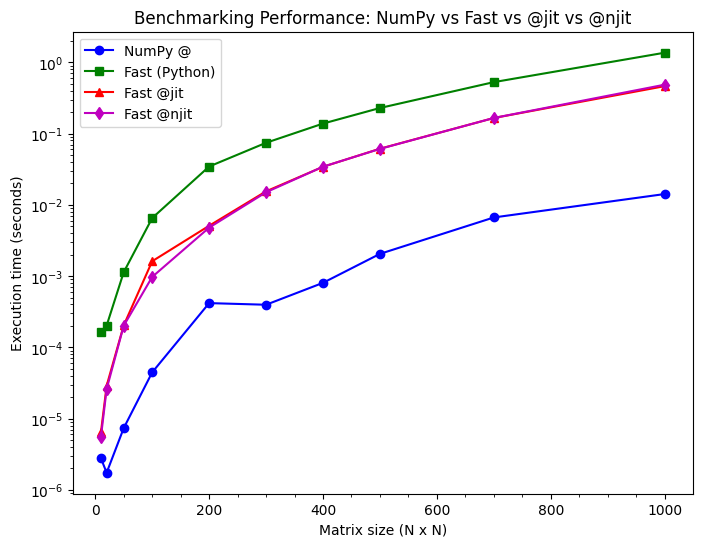

In [28]:
# Plotting the execution times of all matrix multiplication methods
plt.figure(figsize=(8, 6))
plt.plot(N, numpy_times, "bo-", label="NumPy @")
plt.plot(N, fast_times, "gs-", label="Fast (Python)")
plt.plot(N, fast_jit_times, "r^-", label="Fast @jit")
plt.plot(N, fast_njit_times, "md-", label="Fast @njit")
plt.legend()
plt.yscale("log")
plt.minorticks_on()
plt.xlabel("Matrix size (N x N)")
plt.ylabel("Execution time (seconds)")
plt.title("Benchmarking Performance: NumPy vs Fast vs @jit vs @njit")
plt.show()



matrix size: 10x10
cc: 8.809714e-06s | cf: 3.333286e-06s | fc: 1.251786e-05s | ff: 7.964286e-06s

matrix size: 20x20
cc: 3.601800e-05s | cf: 9.720143e-06s | fc: 5.370843e-05s | ff: 3.320271e-05s

matrix size: 50x50
cc: 2.732021e-04s | cf: 5.820829e-05s | fc: 4.121130e-04s | ff: 2.516604e-04s

matrix size: 100x100
cc: 2.024530e-03s | cf: 6.839047e-04s | fc: 3.295940e-03s | ff: 1.360333e-03s

matrix size: 200x200
cc: 5.163572e-03s | cf: 1.228387e-03s | fc: 8.406613e-03s | ff: 4.685149e-03s

matrix size: 300x300
cc: 1.494096e-02s | cf: 4.295405e-03s | fc: 2.499255e-02s | ff: 1.480836e-02s

matrix size: 400x400
cc: 3.492012e-02s | cf: 9.776631e-03s | fc: 5.894496e-02s | ff: 3.350095e-02s

matrix size: 500x500
cc: 6.269990e-02s | cf: 1.896007e-02s | fc: 1.050361e-01s | ff: 6.192664e-02s

matrix size: 700x700
cc: 1.735295e-01s | cf: 5.194581e-02s | fc: 2.855211e-01s | ff: 1.635465e-01s

matrix size: 1000x1000
cc: 4.585262e-01s | cf: 1.316321e-01s | fc: 9.493357e-01s | ff: 4.411877e-01s


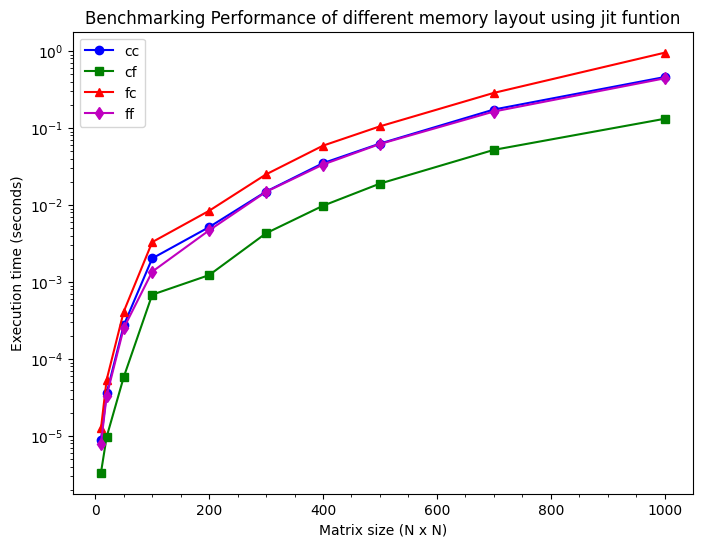

In [31]:
cc_jit = []
cf_jit = []
fc_jit = []
ff_jit = []

for i in N:
    print(f"\nmatrix size: {i}x{i}")
    # Create matrices in both C-contiguous (row-major) and Fortran-contiguous (column-major) layouts
    mat1_c = np. random.rand(i,i)
    mat1_f = np.asfortranarray(mat1_c)
    mat2_c = np.random.rand(i,i)
    mat2_f = np.asfortranarray(mat2_c)
    # Measure execution times for all four combinations of input layouts using jit-compiled function
    cc_timing = %timeit -o -q -n 1 fast_matrix_product_jit(mat1_c, mat2_c)
    cf_timing = %timeit -o -q -n 1 fast_matrix_product_jit(mat1_c, mat2_f)
    fc_timing = %timeit -o -q -n 1 fast_matrix_product_jit(mat1_f, mat2_c)
    ff_timing = %timeit -o -q -n 1 fast_matrix_product_jit(mat1_f, mat2_f) 
    
    # Store average execution times for later comparison
    cc_jit.append(cc_timing.average)
    cf_jit.append(cf_timing.average)
    fc_jit.append(fc_timing.average)
    ff_jit.append(ff_timing.average)
    
    print(f"cc: {cc_timing.average:.6e}s | cf: {cf_timing.average:.6e}s | "
    f"fc: {fc_timing.average:.6e}s | ff: {ff_timing.average:.6e}s")
    
# Plotting the execution times of nxn matrix multiplication with different memory layouts
plt.figure(figsize=(8, 6))
plt.plot(N, cc_jit, "bo-", label="cc")
plt.plot(N, cf_jit, "gs-", label="cf")
plt.plot(N, fc_jit, "r^-", label="fc")
plt.plot(N, ff_jit, "md-", label="ff")
plt.legend()
plt.yscale("log")
plt.minorticks_on()
plt.xlabel("Matrix size (N x N)")
plt.ylabel("Execution time (seconds)")
plt.title("Benchmarking Performance of different memory layout using jit funtion")
plt.show()


matrix size: 10x10
cc: 6.577429e-06s | cf: 2.886857e-06s | fc: 9.565571e-06s | ff: 5.767857e-06s

matrix size: 20x20
cc: 3.009529e-05s | cf: 7.238143e-06s | fc: 5.145229e-05s | ff: 2.627986e-05s

matrix size: 50x50
cc: 2.132323e-04s | cf: 4.463086e-05s | fc: 3.519050e-04s | ff: 2.233157e-04s

matrix size: 100x100
cc: 1.181887e-03s | cf: 1.963393e-04s | fc: 1.819238e-03s | ff: 1.029940e-03s

matrix size: 200x200


cc: 5.097280e-03s | cf: 1.226066e-03s | fc: 8.717488e-03s | ff: 4.760875e-03s

matrix size: 300x300
cc: 1.510773e-02s | cf: 4.335101e-03s | fc: 2.607700e-02s | ff: 1.488108e-02s

matrix size: 400x400
cc: 3.518865e-02s | cf: 9.888214e-03s | fc: 5.790672e-02s | ff: 3.325410e-02s

matrix size: 500x500
cc: 6.224322e-02s | cf: 1.892094e-02s | fc: 1.047645e-01s | ff: 6.134402e-02s

matrix size: 700x700
cc: 1.695189e-01s | cf: 5.316751e-02s | fc: 2.811041e-01s | ff: 1.688840e-01s

matrix size: 1000x1000
cc: 4.664395e-01s | cf: 1.290187e-01s | fc: 9.441274e-01s | ff: 4.369044e-01s


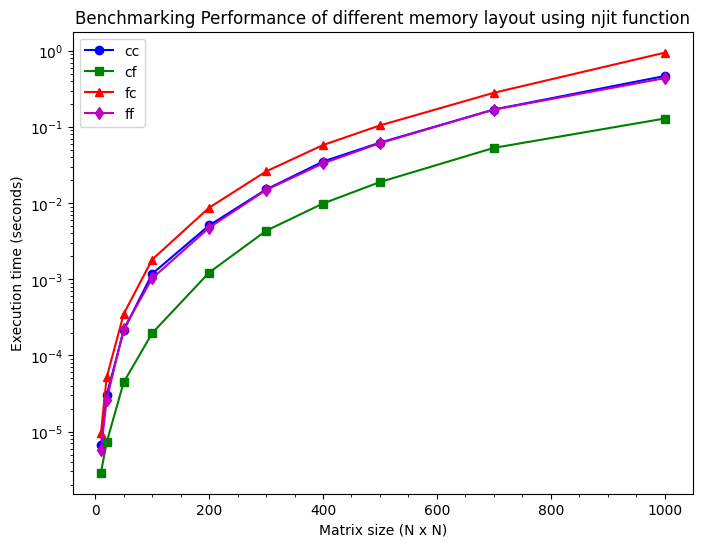

In [32]:
cc_njit = []
cf_njit = []
fc_njit = []
ff_njit = []

for i in N:
    print(f"\nmatrix size: {i}x{i}")
    # Create matrices in both C-contiguous (row-major) and Fortran-contiguous (column-major) layouts
    mat1_c = np. random.rand(i,i)
    mat1_f = np.asfortranarray(mat1_c)
    mat2_c = np.random.rand(i,i)
    mat2_f = np.asfortranarray(mat2_c)
    # Measure execution times for all four combinations of input layouts using jit-compiled function
    cc_timing_njit = %timeit -o -q -n 1 fast_matrix_product_njit(mat1_c, mat2_c)
    cf_timing_njit = %timeit -o -q -n 1 fast_matrix_product_njit(mat1_c, mat2_f)
    fc_timing_njit = %timeit -o -q -n 1 fast_matrix_product_njit(mat1_f, mat2_c)
    ff_timing_njit = %timeit -o -q -n 1 fast_matrix_product_njit(mat1_f, mat2_f) 
    
    # Store average execution times for later comparison
    cc_njit.append(cc_timing_njit.average)
    cf_njit.append(cf_timing_njit.average)
    fc_njit.append(fc_timing_njit.average)
    ff_njit.append(ff_timing_njit.average)
    
    print(f"cc: {cc_timing_njit.average:.6e}s | cf: {cf_timing_njit.average:.6e}s | "
    f"fc: {fc_timing_njit.average:.6e}s | ff: {ff_timing_njit.average:.6e}s")
    
# Plotting the execution times of nxn matrix multiplication using njit function with different memory layouts
plt.figure(figsize=(8, 6))
plt.plot(N, cc_njit, "bo-", label="cc")
plt.plot(N, cf_njit, "gs-", label="cf")
plt.plot(N, fc_njit, "r^-", label="fc")
plt.plot(N, ff_njit, "md-", label="ff")
plt.legend()
plt.yscale("log")
plt.minorticks_on()
plt.xlabel("Matrix size (N x N)")
plt.ylabel("Execution time (seconds)")
plt.title("Benchmarking Performance of different memory layout using njit function")
plt.show()

# Comment

The combination of C-style ordering for Matrix A and Fortran-style ordering for Matrix B results in the fastest computation time. This is because both matrices store the elements that are accessed together in contiguous memory locations, minimizing cache misses and improving data locality. When the first row of A is multiplied with the first column of B, their elements are stored adjacently in memory, allowing more efficient memory access. Two plots shows that all methods have similar gradients, indicating equivalent computational complexity, while the differences in execution time arise mainly from memory layout effects.